# Aplicação de Pesquisa Operacional - PPGMNE 2021

## Antonio Carlos da Silva Júnior

### Prof. Cassius Tadeu Scarpin

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,10)

# Implementação do Perceptron

In [2]:
class Perceptron:
    
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:] + self.w_[0])
    
    
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColorMap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:,0].min() - 1

# Dados de entrada

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.columns = ['Petal_length', 'Sepal_length', 'Petal_width', 'Sepal_width', 'Specie']
df.drop(columns=['Sepal_length', 'Sepal_width'], inplace=True)
df = df[df.Specie.isin(['Iris-versicolor', 'Iris-virginica'])].copy()
df.head()

,Petal_length,Petal_width,Specie
50,7.0,4.7,Iris-versicolor
51,6.4,4.5,Iris-versicolor
52,6.9,4.9,Iris-versicolor
53,5.5,4.0,Iris-versicolor
54,6.5,4.6,Iris-versicolor


<AxesSubplot:xlabel='Petal_length', ylabel='Petal_width'>

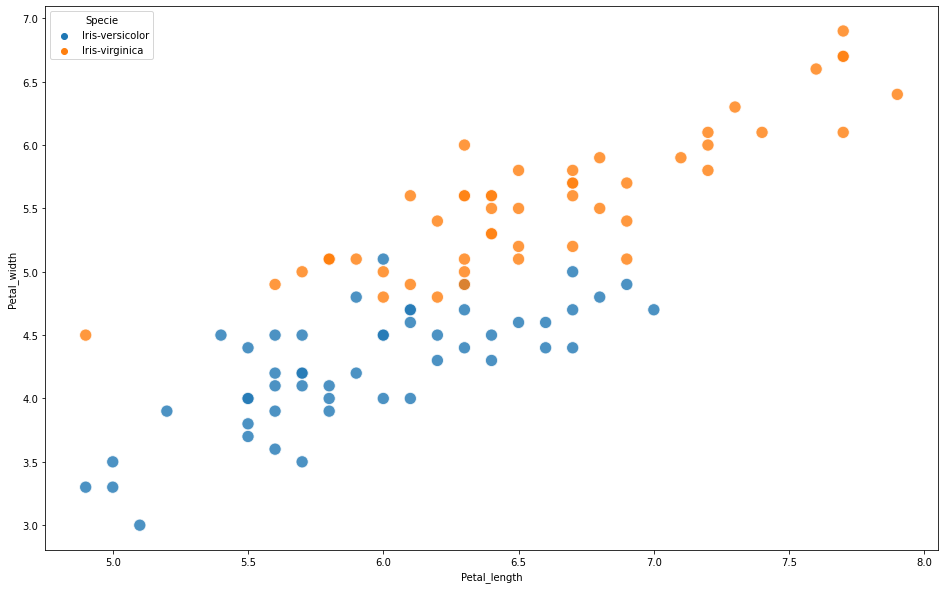

In [4]:
sns.scatterplot(data=df, x='Petal_length', y='Petal_width', hue='Specie', s=150, alpha=0.8)

# Objetivo: classificar as espécies Virgínica e Versicolor

* 1: versicolor
* 0: virgínica

In [5]:
df['Specie'] = np.where(df['Specie'] == 'Iris-versicolor', 1, 0)

## Amostragem

* 70% para dados de treino
* 30% para dados de teste

In [6]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=1986, stratify=df[['Specie']])

## Treino do perceptron

In [7]:
clf = Perceptron()
clf.fit(X=df_train.drop(columns='Specie').to_numpy(), y=df_train['Specie'].to_numpy())

## Validação

In [8]:
y_pred = clf.predict(df_test.drop(columns='Specie').to_numpy())

In [9]:
# Matriz de confusão:
conf_matrix = pd.crosstab(df_test['Specie'], y_pred, colnames=['Specie pred'])
conf_matrix

Specie pred,0,1
Specie,,
0,14,1
1,1,14


In [10]:
conf_matrix = conf_matrix.to_numpy()

In [11]:
# Acurácia:

(conf_matrix[0,0] + conf_matrix[1,1]) / sum(sum(conf_matrix))

0.9333333333333333